In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

import pandas as pd
import numpy as np
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

from tensorflow.keras import layers, Model

from tensorflow.keras.models import load_model
import os
from keras.layers import Embedding
from keras.layers import GlobalAvgPool1D
from keras.layers import Embedding

In [2]:
directory_path = os.getcwd()

# Create an empty DataFrame to store the merged data
merged_df = pd.DataFrame()

# Loop through XLSX files and merge them
for filename in os.listdir(directory_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory_path, filename)
        df = pd.read_csv(file_path)
        merged_df = pd.concat([merged_df, df], ignore_index=True)

In [3]:
df = merged_df
df

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
19995,im having ssa examination tomorrow in the morn...,0
19996,i constantly worry about their fight against n...,1
19997,i feel its important to share this info for th...,1
19998,i truly feel that if you are passionate enough...,1


In [4]:
symbols_list = ['!', '?', '_', '„', 'ک', 'â', '.', '€', '™', '¦', '£ً', '¤', 'ں', '¨', ',', '$', '~', '%', '^', '&', '*', ';', ':', '', '"']
df['text'] = df['text'].apply(lambda x: re.sub(r'[{}]'.format(''.join(symbols_list)), '', x))
df['text'] = df['text'].apply(lambda x: re.sub(r'http\S+', '', x))
df = df.dropna()

In [5]:
df

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0
...,...,...
19995,im having ssa examination tomorrow in the morn...,0
19996,i constantly worry about their fight against n...,1
19997,i feel its important to share this info for th...,1
19998,i truly feel that if you are passionate enough...,1


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score

In [7]:
vectorizer = TfidfVectorizer()


X = vectorizer.fit_transform(df['text'])

In [8]:
y = np.array(df['label'].tolist())

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.25, random_state=1)

In [10]:
SVM = svm.SVC(kernel='linear')
SVM.fit(X_train,Y_train)

SVC(kernel='linear')

In [11]:
# predict the labels on validation dataset
predictions_SVM = SVM.predict(X_test)
# Use accuracy_score function to get the accuracy
print("SVM Accuracy Score -> ",accuracy_score(predictions_SVM, Y_test)*100)

SVM Accuracy Score ->  87.86


<Axes: xlabel='label'>

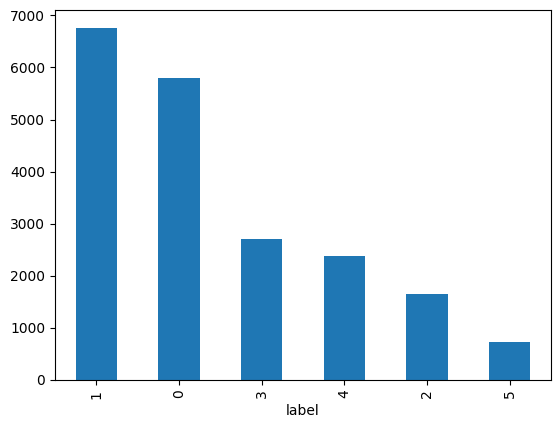

In [12]:
df['label'].value_counts().plot(kind='bar')

In [13]:
from wordcloud import WordCloud

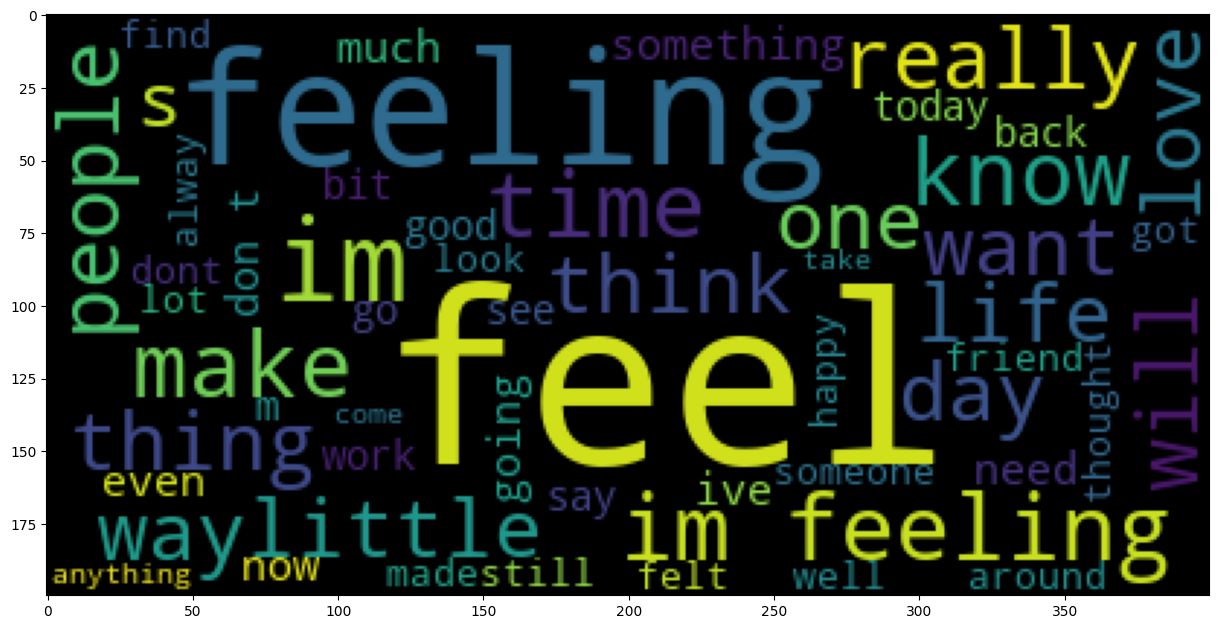

In [14]:
wc = WordCloud(min_font_size=8)
spam_wc = wc.generate(df['text'].str.cat(sep=" "))
plt.figure(figsize=(15, 8))
plt.imshow(spam_wc)

In [9]:
train = pd.read_csv("training.csv")
test = pd.read_csv("test.csv")
val = pd.read_csv("validation.csv")

In [11]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [12]:
def tokenization(inputs):
    return word_tokenize(inputs) #REFERENCE[1]


train['text_tokenized'] = train['text'].apply(tokenization)
val['text_tokenized'] = val['text'].apply(tokenization)

In [13]:
train.head()

,text,label,text_tokenized
0,i didnt feel humiliated,0,"[i, didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,"[i, can, go, from, feeling, so, hopeless, to, ..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, a, minute, to, post, i, feel, g..."
3,i am ever feeling nostalgic about the fireplac...,2,"[i, am, ever, feeling, nostalgic, about, the, ..."
4,i am feeling grouchy,3,"[i, am, feeling, grouchy]"


In [14]:
stop_words = set(stopwords.words('english'))

def stopwords_remove(inputs):
    return [item for item in inputs if item not in stop_words]

train['text_stop'] = train['text_tokenized'].apply(stopwords_remove)
val['text_stop'] = val['text_tokenized'].apply(stopwords_remove)

train.head()

,text,label,text_tokenized,text_stop
0,i didnt feel humiliated,0,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]"
1,i can go from feeling so hopeless to so damned...,0,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st..."
4,i am feeling grouchy,3,"[i, am, feeling, grouchy]","[feeling, grouchy]"


In [15]:
lemmatizer = WordNetLemmatizer()

def lemmatization(inputs):
    return [lemmatizer.lemmatize(word=x, pos='v') for x in inputs]

train['text_lemmatized'] = train['text_stop'].apply(lemmatization)
val['text_lemmatized'] = val['text_stop'].apply(lemmatization)

train.head()

,text,label,text_tokenized,text_stop,text_lemmatized
0,i didnt feel humiliated,0,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]"
1,i can go from feeling so hopeless to so damned...,0,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so..."
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]"
3,i am ever feeling nostalgic about the fireplac...,2,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still..."
4,i am feeling grouchy,3,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]"


In [16]:
train['text_cleaned'] = train['text_lemmatized'].str.join(' ')
val['text_cleaned'] = val['text_lemmatized'].str.join(' ')

train.head()

,text,label,text_tokenized,text_stop,text_lemmatized,text_cleaned
0,i didnt feel humiliated,0,"[i, didnt, feel, humiliated]","[didnt, feel, humiliated]","[didnt, feel, humiliate]",didnt feel humiliate
1,i can go from feeling so hopeless to so damned...,0,"[i, can, go, from, feeling, so, hopeless, to, ...","[go, feeling, hopeless, damned, hopeful, aroun...","[go, feel, hopeless, damn, hopeful, around, so...",go feel hopeless damn hopeful around someone c...
2,im grabbing a minute to post i feel greedy wrong,3,"[im, grabbing, a, minute, to, post, i, feel, g...","[im, grabbing, minute, post, feel, greedy, wrong]","[im, grab, minute, post, feel, greedy, wrong]",im grab minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,"[i, am, ever, feeling, nostalgic, about, the, ...","[ever, feeling, nostalgic, fireplace, know, st...","[ever, feel, nostalgic, fireplace, know, still...",ever feel nostalgic fireplace know still property
4,i am feeling grouchy,3,"[i, am, feeling, grouchy]","[feeling, grouchy]","[feel, grouchy]",feel grouchy


In [17]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [18]:
num_words = 10000
tokenizer = Tokenizer(num_words=num_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train['text_cleaned'])

word_index = tokenizer.word_index

In [19]:
Tokenized_train = tokenizer.texts_to_sequences(train['text_cleaned'])
Tokenized_val = tokenizer.texts_to_sequences(val['text_cleaned'])

In [20]:
maxlen = 40
Padded_train = pad_sequences(Tokenized_train, maxlen=maxlen, padding='pre')
Padded_val = pad_sequences(Tokenized_val, maxlen=maxlen, padding='pre')

In [21]:
Padded_train[0].shape

(40,)

In [27]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
# model.add(GlobalAvgPool1D())

model.add(tf.keras.layers.LSTM(50, return_sequences=True, activation='relu'))
model.add(Dropout(0.3))

model.add(tf.keras.layers.LSTM(40, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(tf.keras.layers.LSTM(40, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 16)            160000    
                                                                 
 lstm (LSTM)                 (None, 40, 50)            13400     
                                                                 
 dropout (Dropout)           (None, 40, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 40, 40)            14560     
                                                                 
 dropout_1 (Dropout)         (None, 40, 40)            0         
                                                                 
 lstm_2 (LSTM)               (None, 40)                12960     
                                                                 
 dropout_2 (Dropout)         (None, 40)                0

In [28]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,
                 validation_data=(Padded_val, val['label']), 
                 )


Epoch 1/20
500/500 [==============================] - 15s 23ms/step - loss: 1.7156 - accuracy: 0.3334 - val_loss: 1.3069 - val_accuracy: 0.4105
Epoch 2/20
500/500 [==============================] - 11s 21ms/step - loss: 1.1494 - accuracy: 0.4987 - val_loss: 1.0295 - val_accuracy: 0.6245
Epoch 3/20
500/500 [==============================] - 11s 21ms/step - loss: 0.9267 - accuracy: 0.6358 - val_loss: 0.9685 - val_accuracy: 0.6575
Epoch 4/20
500/500 [==============================] - 11s 21ms/step - loss: 0.7925 - accuracy: 0.6806 - val_loss: 0.8312 - val_accuracy: 0.6745
Epoch 5/20
500/500 [==============================] - 11s 21ms/step - loss: 0.7218 - accuracy: 0.7022 - val_loss: 0.7851 - val_accuracy: 0.7195
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.6439 - accuracy: 0.7346 - val_loss: 0.7073 - val_accuracy: 0.7165
Epoch 7/20
500/500 [==============================] - 11s 22ms/step - loss: 0.5708 - accuracy: 0.7630 - val_loss: 0.9941 - val_accuracy:

In [29]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 1s 8ms/step - loss: 0.5811 - accuracy: 0.8740


In [30]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))


model.add(tf.keras.layers.Conv1D(128, kernel_size=1, activation='relu'))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(40, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 16)            160000    
                                                                 
 conv1d (Conv1D)             (None, 40, 128)           2176      
                                                                 
 dropout_3 (Dropout)         (None, 40, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 40, 50)            35800     
                                                                 
 dropout_4 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_4 (LSTM)               (None, 40, 40)            14560     
                                                                 
 dropout_5 (Dropout)         (None, 40, 40)           

In [31]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 16s 24ms/step - loss: 1.4767 - accuracy: 0.3738 - val_loss: 1.0101 - val_accuracy: 0.6270
Epoch 2/20
500/500 [==============================] - 11s 23ms/step - loss: 0.9231 - accuracy: 0.6398 - val_loss: 0.7864 - val_accuracy: 0.6520
Epoch 3/20
500/500 [==============================] - 11s 23ms/step - loss: 0.7483 - accuracy: 0.6955 - val_loss: 0.7294 - val_accuracy: 0.7065
Epoch 4/20
500/500 [==============================] - 11s 22ms/step - loss: 0.6291 - accuracy: 0.7364 - val_loss: 0.5849 - val_accuracy: 0.7725
Epoch 5/20
500/500 [==============================] - 11s 22ms/step - loss: 0.5123 - accuracy: 0.7909 - val_loss: 0.4700 - val_accuracy: 0.8395
Epoch 6/20
500/500 [==============================] - 11s 22ms/step - loss: 0.4138 - accuracy: 0.8510 - val_loss: 0.4041 - val_accuracy: 0.8660
Epoch 7/20
500/500 [==============================] - 11s 23ms/step - loss: 0.3550 - accuracy: 0.8773 - val_loss: 0.3961 - val_accuracy:

In [32]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 1s 8ms/step - loss: 0.4019 - accuracy: 0.8945


In [33]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))

model.add(tf.keras.layers.LSTM(100, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(40, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(40, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 16)            160000    
                                                                 
 lstm_6 (LSTM)               (None, 40, 100)           46800     
                                                                 
 dropout_7 (Dropout)         (None, 40, 100)           0         
                                                                 
 lstm_7 (LSTM)               (None, 40, 50)            30200     
                                                                 
 dropout_8 (Dropout)         (None, 40, 50)            0         
                                                                 
 lstm_8 (LSTM)               (None, 40, 40)            14560     
                                                                 
 dropout_9 (Dropout)         (None, 40, 40)           

In [34]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 23s 37ms/step - loss: 1.6859 - accuracy: 0.3298 - val_loss: 1.5155 - val_accuracy: 0.3640
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 1.2187 - accuracy: 0.4403 - val_loss: 1.0200 - val_accuracy: 0.5940
Epoch 3/20
500/500 [==============================] - 17s 33ms/step - loss: 0.9113 - accuracy: 0.6637 - val_loss: 0.7772 - val_accuracy: 0.7325
Epoch 4/20
500/500 [==============================] - 18s 35ms/step - loss: 0.7426 - accuracy: 0.7551 - val_loss: 0.7114 - val_accuracy: 0.7565
Epoch 5/20
500/500 [==============================] - 20s 40ms/step - loss: 0.6428 - accuracy: 0.7812 - val_loss: 0.6542 - val_accuracy: 0.7715
Epoch 6/20
500/500 [==============================] - 21s 43ms/step - loss: 0.5543 - accuracy: 0.8069 - val_loss: 0.5837 - val_accuracy: 0.8135
Epoch 7/20
500/500 [==============================] - 17s 34ms/step - loss: 0.4678 - accuracy: 0.8398 - val_loss: 0.5012 - val_accuracy:

In [35]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 1s 12ms/step - loss: 0.5586 - accuracy: 0.8675


In [36]:
model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))


model.add(tf.keras.layers.LSTM(50, activation='relu', return_sequences=True))
model.add(Dropout(0.1))
model.add(tf.keras.layers.LSTM(40, activation='relu', return_sequences=True))
model.add(Dropout(0.2))
model.add(tf.keras.layers.LSTM(30, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(20, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(tf.keras.layers.LSTM(20, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 40, 16)            160000    
                                                                 
 lstm_10 (LSTM)              (None, 40, 50)            13400     
                                                                 
 dropout_11 (Dropout)        (None, 40, 50)            0         
                                                                 
 lstm_11 (LSTM)              (None, 40, 40)            14560     
                                                                 
 dropout_12 (Dropout)        (None, 40, 40)            0         
                                                                 
 lstm_12 (LSTM)              (None, 40, 30)            8520      
                                                                 
 dropout_13 (Dropout)        (None, 40, 30)           

In [37]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 23s 35ms/step - loss: 1.6094 - accuracy: 0.3166 - val_loss: 1.6750 - val_accuracy: 0.3515
Epoch 2/20
500/500 [==============================] - 17s 34ms/step - loss: 1.3779 - accuracy: 0.3518 - val_loss: 1.1903 - val_accuracy: 0.4235
Epoch 3/20
500/500 [==============================] - 17s 34ms/step - loss: 1.1095 - accuracy: 0.4434 - val_loss: 1.0833 - val_accuracy: 0.4890
Epoch 4/20
500/500 [==============================] - 17s 33ms/step - loss: 1.0034 - accuracy: 0.4940 - val_loss: 0.9976 - val_accuracy: 0.5665
Epoch 5/20
500/500 [==============================] - 17s 33ms/step - loss: 0.8060 - accuracy: 0.6813 - val_loss: 0.6857 - val_accuracy: 0.7835
Epoch 6/20
500/500 [==============================] - 17s 33ms/step - loss: 0.6120 - accuracy: 0.7917 - val_loss: 0.6057 - val_accuracy: 0.8095
Epoch 7/20
500/500 [==============================] - 17s 33ms/step - loss: 0.5100 - accuracy: 0.8298 - val_loss: 0.5905 - val_accuracy:

In [38]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 1s 14ms/step - loss: 0.7501 - accuracy: 0.8630


In [39]:
class GNNLayer(tf.keras.layers.Layer):
    def __init__(self, units, adjacency_matrix, **kwargs):
        super().__init__(**kwargs)
        self.units = units
        self.adjacency_matrix = adjacency_matrix

    def call(self, inputs):
        # Compute the weighted sum of the neighbors' features.
        neighbors_features = tf.matmul(self.adjacency_matrix, inputs)

        # Update the node features.
        node_features = tf.nn.relu(tf.add(inputs, neighbors_features))

        return node_features

In [40]:
Padded_train.shape

(16000, 40)

In [41]:
Padded_train[0].shape

(40,)

In [42]:
import numpy as np

In [43]:
adjacency_matrix = np.zeros((40, 40))

# Set the adjacency matrix to 1 for all pairs of nodes that are connected.
for i in range(40):
    for j in range(40):
        if i != j:
            adjacency_matrix[i, j] = 1

# Set the adjacency matrix to 0 for the first and last node.
adjacency_matrix[0, :] = 0
adjacency_matrix[:, 0] = 0
adjacency_matrix[-1, :] = 0
adjacency_matrix[:, -1] = 0

print(adjacency_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 1. 0.]
 [0. 1. 0. ... 1. 1. 0.]
 ...
 [0. 1. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
adjacency_matrix = tf.cast(adjacency_matrix, tf.float32)

In [45]:

model = Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))

model.add(layers.Flatten())
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   


 embedding_4 (Embedding)     (None, 40, 16)            160000    
                                                                 
 conv1d_1 (Conv1D)           (None, 38, 32)            1568      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 19, 32)           0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 17, 64)            6208      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 8, 64)            0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 6, 64)             12352     
                                                                 
 flatten (Flatten)           (None, 384)               0         
          

In [46]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 4s 5ms/step - loss: 1.4880 - accuracy: 0.4068 - val_loss: 1.3017 - val_accuracy: 0.5020
Epoch 2/20
500/500 [==============================] - 3s 5ms/step - loss: 1.1579 - accuracy: 0.5268 - val_loss: 1.0987 - val_accuracy: 0.5390
Epoch 3/20
500/500 [==============================] - 3s 5ms/step - loss: 0.8572 - accuracy: 0.6638 - val_loss: 0.9205 - val_accuracy: 0.6630
Epoch 4/20
500/500 [==============================] - 3s 5ms/step - loss: 0.6478 - accuracy: 0.7477 - val_loss: 0.9381 - val_accuracy: 0.6695
Epoch 5/20
500/500 [==============================] - 3s 5ms/step - loss: 0.5402 - accuracy: 0.7916 - val_loss: 1.0231 - val_accuracy: 0.6735
Epoch 6/20
500/500 [==============================] - 3s 5ms/step - loss: 0.4796 - accuracy: 0.8118 - val_loss: 1.1388 - val_accuracy: 0.6650
Epoch 7/20
500/500 [==============================] - 2s 5ms/step - loss: 0.4393 - accuracy: 0.8246 - val_loss: 1.2160 - val_accuracy: 0.6715
Epoch 

In [47]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 2ms/step - loss: 2.5504 - accuracy: 0.6330


In [48]:
model = tf.keras.Sequential()

# Add an embedding layer to convert the words to vectors.
model.add(Embedding(num_words, 16, input_length=maxlen))

model.add(GNNLayer(35, adjacency_matrix))
# model.add(GlobalSumPool())
model.add(tf.keras.layers.Conv1D(32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))
model.add(Dropout(0.1))
model.add(tf.keras.layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.Flatten())
model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 40, 16)            160000    
                                                                 
 gnn_layer (GNNLayer)        (None, 40, 16)            0         
                                                                 
 conv1d_4 (Conv1D)           (None, 38, 32)            1568      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 19, 32)           0         
 1D)                                                             
                                                                 
 dropout_16 (Dropout)        (None, 19, 32)            0         
                                                                 
 conv1d_5 (Conv1D)           (None, 17, 64)            6208      
                                                      

In [49]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 4s 6ms/step - loss: 1.2792 - accuracy: 0.4978 - val_loss: 0.9308 - val_accuracy: 0.6730
Epoch 2/20
500/500 [==============================] - 3s 5ms/step - loss: 0.7216 - accuracy: 0.7411 - val_loss: 0.8003 - val_accuracy: 0.7335
Epoch 3/20
500/500 [==============================] - 3s 5ms/step - loss: 0.5225 - accuracy: 0.8170 - val_loss: 0.7815 - val_accuracy: 0.7315
Epoch 4/20
500/500 [==============================] - 3s 5ms/step - loss: 0.4280 - accuracy: 0.8517 - val_loss: 0.8080 - val_accuracy: 0.7355
Epoch 5/20
500/500 [==============================] - 3s 5ms/step - loss: 0.3720 - accuracy: 0.8705 - val_loss: 0.8358 - val_accuracy: 0.7310
Epoch 6/20
500/500 [==============================] - 3s 5ms/step - loss: 0.3339 - accuracy: 0.8833 - val_loss: 0.8722 - val_accuracy: 0.7335
Epoch 7/20
500/500 [==============================] - 3s 5ms/step - loss: 0.3064 - accuracy: 0.8924 - val_loss: 0.9180 - val_accuracy: 0.7240
Epoch 

In [50]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 2ms/step - loss: 1.3560 - accuracy: 0.7150


In [51]:
model = tf.keras.Sequential()

# Add an embedding layer to convert the words to vectors.
model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(GNNLayer(35, adjacency_matrix))
# model.add(GlobalSumPool())
model.add(tf.keras.layers.LSTM(35, return_sequences=True, activation='relu'))
model.add(Dropout(0.1))

model.add(tf.keras.layers.LSTM(30, activation='relu'))
model.add(Dropout(0.1))


model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 40, 16)            160000    
                                                                 
 gnn_layer_1 (GNNLayer)      (None, 40, 16)            0         
                                                                 
 lstm_15 (LSTM)              (None, 40, 35)            7280      
                                                                 
 dropout_18 (Dropout)        (None, 40, 35)            0         
                                                                 
 lstm_16 (LSTM)              (None, 30)                7920      
                                                                 
 dropout_19 (Dropout)        (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 6)                

In [52]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 10s 15ms/step - loss: 1.4131 - accuracy: 0.4178 - val_loss: 1.0361 - val_accuracy: 0.6415
Epoch 2/20
500/500 [==============================] - 7s 14ms/step - loss: 0.8181 - accuracy: 0.7151 - val_loss: 0.8501 - val_accuracy: 0.7095
Epoch 3/20
500/500 [==============================] - 7s 14ms/step - loss: 0.5693 - accuracy: 0.7917 - val_loss: 0.8114 - val_accuracy: 0.7390
Epoch 4/20
500/500 [==============================] - 7s 14ms/step - loss: 0.4156 - accuracy: 0.8545 - val_loss: 0.8003 - val_accuracy: 0.7625
Epoch 5/20
500/500 [==============================] - 7s 14ms/step - loss: 0.3619 - accuracy: 0.8877 - val_loss: 0.7814 - val_accuracy: 0.7865
Epoch 6/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2645 - accuracy: 0.9073 - val_loss: 0.8061 - val_accuracy: 0.7950
Epoch 7/20
500/500 [==============================] - 7s 14ms/step - loss: 0.2277 - accuracy: 0.9194 - val_loss: 0.8066 - val_accuracy: 0.805

In [53]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 5ms/step - loss: 1.1615 - accuracy: 0.7900


In [54]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(GNNLayer(35, adjacency_matrix))
model.add(tf.keras.layers.Conv1D(32, kernel_size=1, activation='relu'))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(35, activation='relu')))
model.add(Dropout(0.3))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 40, 16)            160000    
                                                                 
 gnn_layer_2 (GNNLayer)      (None, 40, 16)            0         
                                                                 
 conv1d_7 (Conv1D)           (None, 40, 32)            544       
                                                                 
 bidirectional (Bidirectiona  (None, 70)               19040     
 l)                                                              
                                                                 
 dropout_20 (Dropout)        (None, 70)                0         
                                                                 
 dense_7 (Dense)             (None, 6)                 426       
                                                      

In [55]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 9s 12ms/step - loss: 1.5315 - accuracy: 0.3666 - val_loss: 1.2560 - val_accuracy: 0.5060
Epoch 2/20
500/500 [==============================] - 6s 11ms/step - loss: 0.9317 - accuracy: 0.6827 - val_loss: 0.8265 - val_accuracy: 0.7035
Epoch 3/20
500/500 [==============================] - 5s 11ms/step - loss: 0.5796 - accuracy: 0.7978 - val_loss: 0.7441 - val_accuracy: 0.7565
Epoch 4/20
500/500 [==============================] - 5s 11ms/step - loss: 0.4185 - accuracy: 0.8561 - val_loss: 0.7160 - val_accuracy: 0.7815
Epoch 5/20
500/500 [==============================] - 5s 11ms/step - loss: 0.3271 - accuracy: 0.8929 - val_loss: 0.6821 - val_accuracy: 0.8020
Epoch 6/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2527 - accuracy: 0.9180 - val_loss: 0.7316 - val_accuracy: 0.7900
Epoch 7/20
500/500 [==============================] - 5s 11ms/step - loss: 0.2039 - accuracy: 0.9337 - val_loss: 0.7322 - val_accuracy: 0.8015

In [56]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 4ms/step - loss: 0.9901 - accuracy: 0.7305


In [61]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, 40, 16)            160000    
                                                                 
 gru_4 (GRU)                 (None, 40, 35)            5565      
                                                                 
 gru_5 (GRU)                 (None, 40, 35)            7560      
                                                                 
 gru_6 (GRU)                 (None, 40, 35)            7560      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 35)                2485      
                                                                 
 dense_9 (Dense)             (None, 6)                 216       
                                                                 
Total params: 183,386
Trainable params: 183,386
Non-t

In [62]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 16s 21ms/step - loss: 1.2206 - accuracy: 0.5269 - val_loss: 0.7133 - val_accuracy: 0.7505
Epoch 2/20
500/500 [==============================] - 9s 18ms/step - loss: 0.3887 - accuracy: 0.8654 - val_loss: 0.3617 - val_accuracy: 0.8810
Epoch 3/20
500/500 [==============================] - 9s 19ms/step - loss: 0.1885 - accuracy: 0.9352 - val_loss: 0.2832 - val_accuracy: 0.9050
Epoch 4/20
500/500 [==============================] - 9s 18ms/step - loss: 0.1278 - accuracy: 0.9549 - val_loss: 0.2748 - val_accuracy: 0.9045
Epoch 5/20
500/500 [==============================] - 9s 18ms/step - loss: 0.0978 - accuracy: 0.9644 - val_loss: 0.2898 - val_accuracy: 0.9055
Epoch 6/20
500/500 [==============================] - 9s 18ms/step - loss: 0.0810 - accuracy: 0.9707 - val_loss: 0.2809 - val_accuracy: 0.9065
Epoch 7/20
500/500 [==============================] - 9s 18ms/step - loss: 0.0706 - accuracy: 0.9732 - val_loss: 0.3283 - val_accuracy: 0.905

In [63]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 7ms/step - loss: 0.4948 - accuracy: 0.9040


In [64]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
# model.add(layers.SimpleRNN(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, 40, 16)            160000    
                                                                 
 gru_7 (GRU)                 (None, 40, 35)            5565      
                                                                 
 gru_8 (GRU)                 (None, 40, 35)            7560      
                                                                 
 gru_9 (GRU)                 (None, 35)                7560      
                                                                 
 dense_10 (Dense)            (None, 6)                 216       
                                                                 
Total params: 180,901
Trainable params: 180,901
Non-trainable params: 0
_________________________________________________________________


In [65]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 15s 19ms/step - loss: 1.0906 - accuracy: 0.5851 - val_loss: 0.4886 - val_accuracy: 0.8475
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2957 - accuracy: 0.8968 - val_loss: 0.2991 - val_accuracy: 0.8965
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1865 - accuracy: 0.9343 - val_loss: 0.2630 - val_accuracy: 0.9040
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1385 - accuracy: 0.9475 - val_loss: 0.2765 - val_accuracy: 0.9035
Epoch 5/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1171 - accuracy: 0.9572 - val_loss: 0.2814 - val_accuracy: 0.9000
Epoch 6/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1010 - accuracy: 0.9624 - val_loss: 0.3009 - val_accuracy: 0.8965
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0908 - accuracy: 0.9669 - val_loss: 0.2953 - val_accuracy: 0.901

In [66]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 6ms/step - loss: 0.4469 - accuracy: 0.8940


In [67]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(layers.SimpleRNN(35,return_sequences=True))
model.add(layers.SimpleRNN(35,return_sequences=True))
model.add(layers.SimpleRNN(35,return_sequences=True))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_14 (Embedding)    (None, 40, 16)            160000    
                                                                 
 simple_rnn_2 (SimpleRNN)    (None, 40, 35)            1820      
                                                                 
 simple_rnn_3 (SimpleRNN)    (None, 40, 35)            2485      
                                                                 
 simple_rnn_4 (SimpleRNN)    (None, 40, 35)            2485      
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, 35)                2485      
                                                                 
 dense_11 (Dense)            (None, 6)                 216       
                                                                 
Total params: 169,491
Trainable params: 169,491
Non-t

In [68]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 10s 14ms/step - loss: 1.5829 - accuracy: 0.3335 - val_loss: 1.5329 - val_accuracy: 0.4075
Epoch 2/20
500/500 [==============================] - 6s 13ms/step - loss: 1.0597 - accuracy: 0.6181 - val_loss: 0.8884 - val_accuracy: 0.6840
Epoch 3/20
500/500 [==============================] - 6s 13ms/step - loss: 0.5114 - accuracy: 0.8278 - val_loss: 0.6661 - val_accuracy: 0.7775
Epoch 4/20
500/500 [==============================] - 6s 13ms/step - loss: 0.2398 - accuracy: 0.9249 - val_loss: 0.6673 - val_accuracy: 0.7940
Epoch 5/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1380 - accuracy: 0.9583 - val_loss: 0.7020 - val_accuracy: 0.7940
Epoch 6/20
500/500 [==============================] - 6s 13ms/step - loss: 0.1010 - accuracy: 0.9697 - val_loss: 0.7590 - val_accuracy: 0.8035
Epoch 7/20
500/500 [==============================] - 6s 13ms/step - loss: 0.0726 - accuracy: 0.9776 - val_loss: 0.8852 - val_accuracy: 0.785

In [69]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 4ms/step - loss: 1.0610 - accuracy: 0.7850


In [24]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
# model.add(layers.SimpleRNN(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 40, 16)            160000    
                                                                 
 gru_6 (GRU)                 (None, 40, 35)            5565      
                                                                 
 lstm_1 (LSTM)               (None, 40, 35)            9940      
                                                                 
 gru_7 (GRU)                 (None, 35)                7560      
                                                                 
 dense_2 (Dense)             (None, 6)                 216       
                                                                 
Total params: 183,281
Trainable params: 183,281
Non-trainable params: 0
_________________________________________________________________


In [25]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 14s 20ms/step - loss: 1.2076 - accuracy: 0.5233 - val_loss: 0.6576 - val_accuracy: 0.7665
Epoch 2/20
500/500 [==============================] - 8s 16ms/step - loss: 0.3900 - accuracy: 0.8685 - val_loss: 0.3999 - val_accuracy: 0.8680
Epoch 3/20
500/500 [==============================] - 8s 16ms/step - loss: 0.2366 - accuracy: 0.9197 - val_loss: 0.3307 - val_accuracy: 0.8865
Epoch 4/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1821 - accuracy: 0.9385 - val_loss: 0.3370 - val_accuracy: 0.8900
Epoch 5/20
500/500 [==============================] - 8s 16ms/step - loss: 0.1434 - accuracy: 0.9461 - val_loss: 0.3258 - val_accuracy: 0.8935
Epoch 6/20
500/500 [==============================] - 8s 17ms/step - loss: 0.1072 - accuracy: 0.9603 - val_loss: 0.3730 - val_accuracy: 0.8870
Epoch 7/20
500/500 [==============================] - 8s 16ms/step - loss: 0.0894 - accuracy: 0.9679 - val_loss: 0.3944 - val_accuracy: 0.886

In [26]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 7ms/step - loss: 0.4827 - accuracy: 0.8875


In [81]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(35, kernel_size=1, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_22 (Embedding)    (None, 40, 16)            160000    
                                                                 
 conv1d_16 (Conv1D)          (None, 40, 35)            595       
                                                                 
 dropout_14 (Dropout)        (None, 40, 35)            0         
                                                                 
 gru_61 (GRU)                (None, 40, 35)            7560      
                                                                 
 gru_62 (GRU)                (None, 40, 35)            7560      
                                                                 
 gru_63 (GRU)                (None, 40, 35)            7560      
                                                                 
 simple_rnn_16 (SimpleRNN)   (None, 35)              

In [82]:
epochs = 15
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/15
500/500 [==============================] - 19s 23ms/step - loss: 1.3028 - accuracy: 0.4994 - val_loss: 0.7431 - val_accuracy: 0.7450
Epoch 2/15
500/500 [==============================] - 10s 20ms/step - loss: 0.5344 - accuracy: 0.8136 - val_loss: 0.4031 - val_accuracy: 0.8675
Epoch 3/15
500/500 [==============================] - 10s 20ms/step - loss: 0.2989 - accuracy: 0.8953 - val_loss: 0.2604 - val_accuracy: 0.9110
Epoch 4/15
500/500 [==============================] - 10s 20ms/step - loss: 0.2232 - accuracy: 0.9189 - val_loss: 0.2515 - val_accuracy: 0.9035
Epoch 5/15
500/500 [==============================] - 10s 20ms/step - loss: 0.1850 - accuracy: 0.9317 - val_loss: 0.2298 - val_accuracy: 0.9150
Epoch 6/15
500/500 [==============================] - 10s 20ms/step - loss: 0.1571 - accuracy: 0.9411 - val_loss: 0.2354 - val_accuracy: 0.9115
Epoch 7/15
500/500 [==============================] - 10s 20ms/step - loss: 0.1370 - accuracy: 0.9476 - val_loss: 0.2412 - val_accuracy:

In [83]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 0s 7ms/step - loss: 0.2935 - accuracy: 0.9110


In [75]:
model = tf.keras.Sequential()

model.add(Embedding(num_words, 16, input_length=maxlen))
model.add(tf.keras.layers.Conv1D(35, kernel_size=1, activation='relu'))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(layers.GRU(35, return_sequences=True))
model.add(tf.keras.layers.LSTM(35))

model.add(Dense(6, activation='softmax'))

# Compile the model.
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_20 (Embedding)    (None, 40, 16)            160000    
                                                                 
 conv1d_14 (Conv1D)          (None, 40, 35)            595       
                                                                 
 gru_55 (GRU)                (None, 40, 35)            7560      
                                                                 
 gru_56 (GRU)                (None, 40, 35)            7560      
                                                                 
 gru_57 (GRU)                (None, 40, 35)            7560      
                                                                 
 lstm_10 (LSTM)              (None, 35)                9940      
                                                                 
 dense_19 (Dense)            (None, 6)               

In [76]:
epochs = 20
hist = model.fit(Padded_train, train['label'], epochs=epochs,validation_data=(Padded_val, val['label']),)

Epoch 1/20
500/500 [==============================] - 21s 29ms/step - loss: 1.2514 - accuracy: 0.4888 - val_loss: 0.7250 - val_accuracy: 0.7575
Epoch 2/20
500/500 [==============================] - 12s 24ms/step - loss: 0.4641 - accuracy: 0.8515 - val_loss: 0.4136 - val_accuracy: 0.8670
Epoch 3/20
500/500 [==============================] - 12s 24ms/step - loss: 0.2627 - accuracy: 0.9133 - val_loss: 0.2875 - val_accuracy: 0.9020
Epoch 4/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1950 - accuracy: 0.9349 - val_loss: 0.2944 - val_accuracy: 0.8955
Epoch 5/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1566 - accuracy: 0.9459 - val_loss: 0.2818 - val_accuracy: 0.9065
Epoch 6/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1340 - accuracy: 0.9515 - val_loss: 0.2893 - val_accuracy: 0.9075
Epoch 7/20
500/500 [==============================] - 12s 24ms/step - loss: 0.1210 - accuracy: 0.9561 - val_loss: 0.2832 - val_accuracy:

In [77]:
test['text_tokenized'] = test['text'].apply(tokenization)
test['text_stop'] = test['text_tokenized'].apply(stopwords_remove)
test['text_lemmatized'] = test['text_stop'].apply(lemmatization)
test['text_cleaned'] = test['text_lemmatized'].str.join(' ')

Tokenized_test = tokenizer.texts_to_sequences(test['text_cleaned'])
Padded_test = pad_sequences(Tokenized_test, maxlen=maxlen, padding='pre')

test_evaluate = model.evaluate(Padded_test, test['label'])

63/63 [==============================] - 1s 9ms/step - loss: 0.4177 - accuracy: 0.8975
